In [1]:
from pathlib import Path 
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

from panspace.utils import LogInfo
DIR_LOGS = Path("/home/avila/Servers/watson/data/output-fcgr-full/logs")
list_logs = list(DIR_LOGS.glob("*log"))

In [2]:
log_info = LogInfo()
info = []
for log in list_logs:
    d = log_info(log)
    d["id_log"] = log.stem

    info.append(d)

In [3]:
df = pd.DataFrame(info)
df["rule"] = df["id_log"].apply(lambda x: x.split("-")[0])
df.dropna(inplace=True)

<Axes: xlabel='User time (seconds)', ylabel='Count'>

/home/avila/miniforge3/envs/panspace/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


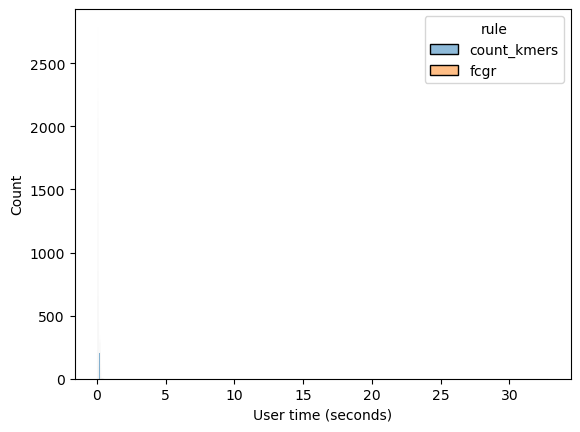

In [4]:
sns.histplot(data=df, x="User time (seconds)", hue="rule",)

<Axes: xlabel='User time (seconds)'>

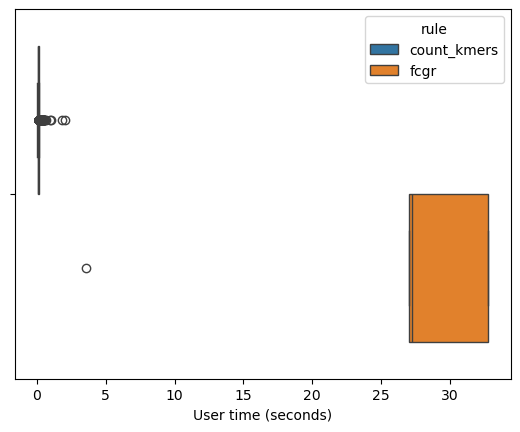

In [5]:
sns.boxplot(data=df, x="User time (seconds)", hue="rule",)

In [6]:
df.head()

,User time (seconds),System time (seconds),Maximum resident set size (kbytes),id_log,rule
0,0.08,0.01,32832.0,count_kmers-mycobacterium_tuberculosis__01-SAM...,count_kmers
1,0.04,0.01,29068.0,count_kmers-streptococcus_pneumoniae__01-SAMEA...,count_kmers
2,0.09,0.02,34316.0,count_kmers-salmonella_enterica__01-SAMEA788929,count_kmers
3,0.24,0.04,33292.0,count_kmers-mycobacterium_tuberculosis__01-SAM...,count_kmers
4,0.18,0.03,28556.0,count_kmers-streptococcus_pneumoniae__01-SAMEA...,count_kmers


In [11]:
df.groupby("rule")[["User time (seconds)"]].aggregate([np.sum, np.mean, np.std, np.min, np.max])

/tmp/ipykernel_6325/1415119489.py:1: FutureWarning: The provided callable <function sum at 0x774d681925f0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby("rule")[["User time (seconds)"]].aggregate([np.sum, np.mean, np.std, np.min, np.max])
/tmp/ipykernel_6325/1415119489.py:1: FutureWarning: The provided callable <function mean at 0x774d681937f0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("rule")[["User time (seconds)"]].aggregate([np.sum, np.mean, np.std, np.min, np.max])
/tmp/ipykernel_6325/1415119489.py:1: FutureWarning: The provided callable <function std at 0x774d68193910> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior

User time (seconds)                                   
                            sum       mean        std   min    max
rule                                                              
count_kmers             1760.05   0.108078   0.065705  0.03   2.02
fcgr                     123.48  24.696000  12.142458  3.58  32.82